In [19]:
from data_handler.data_handler import DataHandler
from ta import add_all_ta_features
import analytics.analytics as analytics
import numpy as np

In [20]:
dh = DataHandler()

In [21]:
data = dh.get_data('DOGEUSDT', '1d', limit = None).iloc[0:,:] #starting from 1 because the lastest data point's volume isn't the final volume
data = add_all_ta_features(data.reindex(index=data.index[::-1]), open="open", high = "high", low = "low", close = "close", 
                            volume = "volume", fillna = True)
data = data.reindex(index=data.index[::-1])
data = np.round(data[['trend_cci', 'momentum_rsi', 'momentum_kama', 'trend_sma_fast', 'trend_ema_fast', 'trend_macd', 'momentum_ao', 'momentum_uo','close','trend_macd_signal']], 2)
#criteria_weights = [cci, rsi, k_avg, sma, ema, macd, awesome, ultimate]

weights = np.array([0.264526, 0.1568098, 0.10433245, 0.03009723, 0.12768833, 0.21690406, 0.05135256, 0.04828958])

/usr/local/lib/python3.6/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [22]:
list_weighted_signals = []

for i in range(data.shape[0]-1):
    close = data['close'][i]
    macd_signal = data['trend_macd_signal'][i]
    ao_prev = data['momentum_ao'][i+1]
    values = np.array(np.transpose(data).iloc[:,i])

    signals = analytics.signal_indicator(close, values, macd_signal, ao_prev)

    signals_value = []
    for sig in signals:
        if sig == 'STRONG BUY':
            signals_value.append(0.0)
        elif sig == 'BUY':
            signals_value.append(0.25)
        elif sig == 'NEUTRAL':
            signals_value.append(0.5)
        elif sig == 'SELL':
            signals_value.append(0.75)
        elif sig == 'STRONG SELL':
            signals_value.append(1.0)

    signals_value = np.array(signals_value)
    weighted_signals = weights@signals_value/np.sum(weights)
    list_weighted_signals.append(weighted_signals)

In [23]:
import matplotlib.pyplot as plt

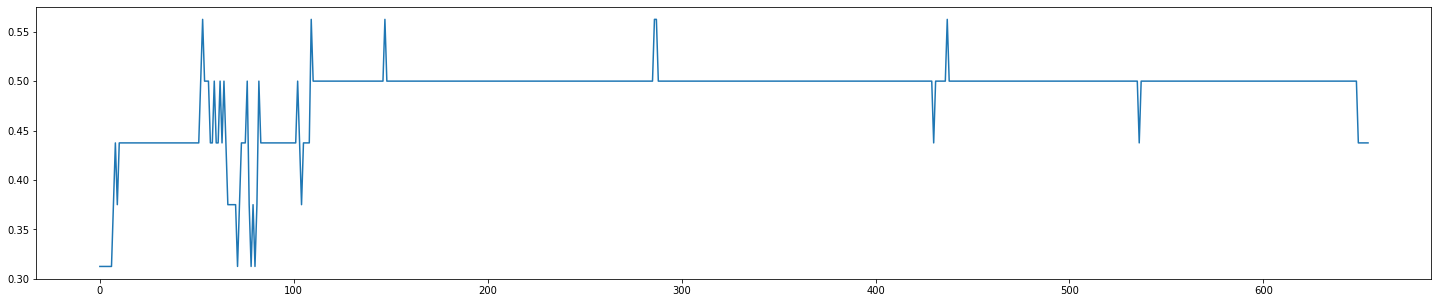

In [24]:
fig = plt.figure(figsize=(25,5))
plt.plot(list_weighted_signals)
plt.show()